In [2]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
drive_path = '/content/drive/MyDrive/data/2025/'
colab_path = '/content/'

files = ['customer_feedback.csv', 'product_catalog.csv', 'sales_data.csv', 'search_trends.csv']

# Copy files
for file in files:
    shutil.copy(drive_path + file, colab_path + file)
    print(f"✅ {file} copied to Colab.")

# Confirm files in Colab
import os
print("\n📂 Files in Colab directory:")
os.listdir(colab_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ customer_feedback.csv copied to Colab.
✅ product_catalog.csv copied to Colab.
✅ sales_data.csv copied to Colab.
✅ search_trends.csv copied to Colab.

📂 Files in Colab directory:


['.config',
 'customer_feedback.csv',
 'search_trends.csv',
 'sales_data.csv',
 'drive',
 'product_catalog.csv',
 'sample_data']

Display Data

In [3]:
import pandas as pd

# Load data files
feedback_df = pd.read_csv('/content/customer_feedback.csv')
catalog_df = pd.read_csv('/content/product_catalog.csv')
sales_df = pd.read_csv('/content/sales_data.csv')
search_df = pd.read_csv('/content/search_trends.csv')

# Show basic info for each DataFrame
print("\n📋 Feedback Data:")
display(feedback_df.head(), feedback_df.info())

print("\n📋 Product Catalog:")
display(catalog_df.head(), catalog_df.info())

print("\n📋 Sales Data:")
display(sales_df.head(), sales_df.info())

print("\n📋 Search Trends:")
display(search_df.head(), search_df.info())



📋 Feedback Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273389 entries, 0 to 273388
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   productId     273389 non-null  object 
 1   commentText   273389 non-null  object 
 2   rating        270708 non-null  float64
 3   reviewerName  273389 non-null  object 
 4   location      273389 non-null  object 
 5   date          273389 non-null  object 
dtypes: float64(1), object(5)
memory usage: 12.5+ MB


,productId,commentText,rating,reviewerName,location,date
0,P1001,"Honestly, I found this tank top to be uncomfor...",2.0,Angelica Littel Sr.,North Celestine,2024-02-18
1,P1001,sizing and the material felt cheap..,4.0,Ronald Fay,Halvorsonboro,2023-12-01
2,P1001,delivery was late.. 🤷‍♂️🔥,5.0,Dr. Lloyd Smitham,New Ciara,2024-10-28
3,P1001,"From my experience, the tank top was perfect. ...",4.0,Christopher Hartmann,North Ally,2024-04-09
4,P1001,The tank top is stylish. Goes well with everyt...,4.0,Jerry Bergstrom,Port Nikitaborough,2024-09-13


None


📋 Product Catalog:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   productId    10000 non-null  object
 1   title        10000 non-null  object
 2   description  10000 non-null  object
 3   category     10000 non-null  object
 4   modifiers    10000 non-null  object
 5   keywords     10000 non-null  object
 6   releaseDate  10000 non-null  object
dtypes: object(7)
memory usage: 547.0+ KB


,productId,title,description,category,modifiers,keywords,releaseDate
0,P1001,Solid Denim Tank Top,With influences of tank top combining solid pe...,tank top,"solid, denim","loose, white, tank top",2024-08-05
1,P1002,Sleeveless Plaid Trench Coat,For fans of trench coat combining sleeveless m...,trench coat,"sleeveless, plaid","white, winter, trench coat",2023-09-03
2,P1003,Wool Printed Sandals,Meticulously crafted sandals combining wool st...,sandals,"wool, printed","wool, olive, sandals",2023-11-22
3,P1004,Fitted Women Romper,Inspired by romper combining fitted performanc...,romper,"fitted, women","sleeveless, striped, romper",2023-02-10
4,P1005,Loose Floral Sneakers,Made to celebrate sneakers combining loose ref...,sneakers,"loose, floral","pumps, striped, sneakers",2024-04-28


None


📋 Sales Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276243 entries, 0 to 276242
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   productId     276243 non-null  object
 1   quantitySold  276243 non-null  int64 
 2   timestamp     276243 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.3+ MB


,productId,quantitySold,timestamp
0,P1001,15,2023-10-15
1,P1001,25,2024-03-03
2,P1001,26,2023-07-26
3,P1001,22,2023-09-08
4,P1001,16,2023-10-08


None


📋 Search Trends:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275837 entries, 0 to 275836
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   query      275837 non-null  object
 1   frequency  275837 non-null  int64 
 2   timestamp  275837 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.3+ MB


,query,frequency,timestamp
0,men tank top,96,2023-08-12
1,tank top,70,2024-05-22
2,men tank top,104,2022-09-15
3,women olive navy tank top,52,2023-10-13
4,bright yellow,56,2024-12-02


None

 Data Cleaning Tasks
 * Clean Timestamps in sales_data.csv

In [4]:
import pandas as pd
from datetime import datetime

# Load sales data (if not loaded)
#sales_df = pd.read_csv('/content/sales_data.csv')

# Function to clean timestamps
def clean_timestamp(date_str):
    try:
        # Try parsing the date
        return pd.to_datetime(date_str, errors='coerce', format='%Y-%m-%d')
    except:
        return pd.NaT

# Apply cleaning
sales_df['timestamp'] = sales_df['timestamp'].apply(clean_timestamp)

# Drop rows with NaT (invalid dates)
sales_df = sales_df.dropna(subset=['timestamp']).reset_index(drop=True)

# Preview cleaned data
print("\n✅ Cleaned Sales Data:")
display(sales_df.head())



✅ Cleaned Sales Data:


,productId,quantitySold,timestamp
0,P1001,15,2023-10-15
1,P1001,25,2024-03-03
2,P1001,26,2023-07-26
3,P1001,22,2023-09-08
4,P1001,16,2023-10-08


Cleen feedback

In [5]:
import re

# Function to clean comment text
def clean_text(text):
    if pd.isnull(text):
        return ""
    # Remove special characters and emojis
    text = re.sub(r'[^\w\s.,!?]', '', text)
    # Remove "Reviewed by..." pattern
    text = re.sub(r'\(Reviewed by.*?\)', '', text, flags=re.IGNORECASE)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning
feedback_df['cleaned_comment'] = feedback_df['commentText'].apply(clean_text)

# Preview cleaned comments
print("\n✅ Cleaned Feedback Data:")
display(feedback_df[['commentText', 'cleaned_comment']].head())



✅ Cleaned Feedback Data:


,commentText,cleaned_comment
0,"Honestly, I found this tank top to be uncomfor...","Honestly, I found this tank top to be uncomfor..."
1,sizing and the material felt cheap..,sizing and the material felt cheap..
2,delivery was late.. 🤷‍♂️🔥,delivery was late..
3,"From my experience, the tank top was perfect. ...","From my experience, the tank top was perfect. ..."
4,The tank top is stylish. Goes well with everyt...,The tank top is stylish. Goes well with everyt...


Merge Code for Feedback + Catalog + Sales


In [12]:
# Merge Feedback + Product Catalog
merged_df = feedback_df.merge(catalog_df, on='productId', how='left')

# Aggregate Sales Data by Product + Month-Year
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'])
sales_df['month_year'] = sales_df['timestamp'].dt.to_period('M').astype(str)
sales_agg = sales_df.groupby(['productId', 'month_year'])['quantitySold'].sum().reset_index()

# Add 'month_year' to feedback data for merge
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['month_year'] = merged_df['date'].dt.to_period('M').astype(str)

# Merge sales data
merged_df = merged_df.merge(sales_agg, on=['productId', 'month_year'], how='left')

# Fill missing sales with 0
merged_df['quantitySold'] = merged_df['quantitySold'].fillna(0)

# Preview merged data
print("\n✅ Merged Feedback + Catalog + Sales:")
display(merged_df.head())



✅ Merged Feedback + Catalog + Sales:


,productId,commentText,rating,reviewerName,location,date,cleaned_comment,title,description,category,modifiers,keywords,releaseDate,month_year,quantitySold
0,P1001,"Honestly, I found this tank top to be uncomfor...",2.0,Angelica Littel Sr.,North Celestine,2024-02-18,"Honestly, I found this tank top to be uncomfor...",Solid Denim Tank Top,With influences of tank top combining solid pe...,tank top,"solid, denim","loose, white, tank top",2024-08-05,2024-02,0.0
1,P1001,sizing and the material felt cheap..,4.0,Ronald Fay,Halvorsonboro,2023-12-01,sizing and the material felt cheap..,Solid Denim Tank Top,With influences of tank top combining solid pe...,tank top,"solid, denim","loose, white, tank top",2024-08-05,2023-12,4.0
2,P1001,delivery was late.. 🤷‍♂️🔥,5.0,Dr. Lloyd Smitham,New Ciara,2024-10-28,delivery was late..,Solid Denim Tank Top,With influences of tank top combining solid pe...,tank top,"solid, denim","loose, white, tank top",2024-08-05,2024-10,0.0
3,P1001,"From my experience, the tank top was perfect. ...",4.0,Christopher Hartmann,North Ally,2024-04-09,"From my experience, the tank top was perfect. ...",Solid Denim Tank Top,With influences of tank top combining solid pe...,tank top,"solid, denim","loose, white, tank top",2024-08-05,2024-04,0.0
4,P1001,The tank top is stylish. Goes well with everyt...,4.0,Jerry Bergstrom,Port Nikitaborough,2024-09-13,The tank top is stylish. Goes well with everyt...,Solid Denim Tank Top,With influences of tank top combining solid pe...,tank top,"solid, denim","loose, white, tank top",2024-08-05,2024-09,0.0


Prepare search_trends.csv

map queries to products by matching keywords (e.g., "tank top" → category "tank top").


In [13]:
# Lowercase queries for matching
search_df['query'] = search_df['query'].str.lower()

# Add 'month_year' column
search_df['timestamp'] = pd.to_datetime(search_df['timestamp'])
search_df['month_year'] = search_df['timestamp'].dt.to_period('M').astype(str)

# Create a category mapping from product_catalog
catalog_keywords = catalog_df[['category', 'keywords']]
category_map = {}
for _, row in catalog_keywords.iterrows():
    for keyword in row['keywords'].split(','):
        category_map[keyword.strip().lower()] = row['category']

# Map queries to categories
def map_query_to_category(query):
    for keyword, category in category_map.items():
        if keyword in query:
            return category
    return 'Other'

search_df['category'] = search_df['query'].apply(map_query_to_category)

# Aggregate search frequency by category + month
search_agg = search_df.groupby(['category', 'month_year'])['frequency'].sum().reset_index()

# Preview
print("\n✅ Aggregated Search Trends:")
display(search_agg.head())



✅ Aggregated Search Trends:


,category,month_year,frequency
0,blouse,2022-05,59870
1,blouse,2022-06,78648
2,blouse,2022-07,78369
3,blouse,2022-08,76431
4,blouse,2022-09,67816


Final Merging

In [14]:
# Merge search trends by category + month
merged_df = merged_df.merge(search_agg, on=['category', 'month_year'], how='left')

# Fill missing search frequency with 0
#merged_df['frequency'] = merged_df['frequency'].fillna(0)

# Final merged data preview
print("\n✅ Final Merged Data:")
display(merged_df.head())




✅ Final Merged Data:


,productId,commentText,rating,reviewerName,location,date,cleaned_comment,title,description,category,modifiers,keywords,releaseDate,month_year,quantitySold,frequency
0,P1001,"Honestly, I found this tank top to be uncomfor...",2.0,Angelica Littel Sr.,North Celestine,2024-02-18,"Honestly, I found this tank top to be uncomfor...",Solid Denim Tank Top,With influences of tank top combining solid pe...,tank top,"solid, denim","loose, white, tank top",2024-08-05,2024-02,0.0,6617.0
1,P1001,sizing and the material felt cheap..,4.0,Ronald Fay,Halvorsonboro,2023-12-01,sizing and the material felt cheap..,Solid Denim Tank Top,With influences of tank top combining solid pe...,tank top,"solid, denim","loose, white, tank top",2024-08-05,2023-12,4.0,7267.0
2,P1001,delivery was late.. 🤷‍♂️🔥,5.0,Dr. Lloyd Smitham,New Ciara,2024-10-28,delivery was late..,Solid Denim Tank Top,With influences of tank top combining solid pe...,tank top,"solid, denim","loose, white, tank top",2024-08-05,2024-10,0.0,11668.0
3,P1001,"From my experience, the tank top was perfect. ...",4.0,Christopher Hartmann,North Ally,2024-04-09,"From my experience, the tank top was perfect. ...",Solid Denim Tank Top,With influences of tank top combining solid pe...,tank top,"solid, denim","loose, white, tank top",2024-08-05,2024-04,0.0,9057.0
4,P1001,The tank top is stylish. Goes well with everyt...,4.0,Jerry Bergstrom,Port Nikitaborough,2024-09-13,The tank top is stylish. Goes well with everyt...,Solid Denim Tank Top,With influences of tank top combining solid pe...,tank top,"solid, denim","loose, white, tank top",2024-08-05,2024-09,0.0,11471.0


In [15]:
merged_df.to_csv('sales_data_merged.csv', index=False)

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import nltk

# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')  # <-- Add this line to fix the error
nltk.download('punkt_tab')

# Continue with your imports and code
from nltk.sentiment import SentimentIntensityAnalyzer
#from rake_nltk import Rake



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### Redo Sentiment Analysis in merged dataset

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Sentiment scores
merged_df['sentiment_score'] = merged_df['cleaned_comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Sentiment labels
def label_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

merged_df['sentiment_label'] = merged_df['sentiment_score'].apply(label_sentiment)

# Check results
merged_df[['cleaned_comment', 'sentiment_score', 'sentiment_label']].head()


,cleaned_comment,sentiment_score,sentiment_label
0,"Honestly, I found this tank top to be uncomfor...",0.2263,Positive
1,sizing and the material felt cheap..,0.0000,Neutral
2,delivery was late..,0.0000,Neutral
3,"From my experience, the tank top was perfect. ...",0.8126,Positive
4,The tank top is stylish. Goes well with everyt...,0.4926,Positive


Sentiment Distribution Bar Chart


In [27]:
import plotly.express as px

# Sentiment distribution
sentiment_counts = merged_df['sentiment_label'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment_label', 'count']  # Rename columns properly

# Bar chart
fig = px.bar(sentiment_counts,
             x='sentiment_label', y='count', color='sentiment_label',
             labels={'sentiment_label': 'Sentiment', 'count': 'Count'},
             title='Overall Sentiment Distribution')
fig.show()


Sales vs. Sentiment
* Products with good/bad reviews vs. total sales.

In [28]:
import plotly.express as px

# Group data: average sentiment + total sales per product
sales_sentiment = merged_df.groupby('productId').agg({
    'sentiment_score': 'mean',
    'quantitySold': 'sum'
}).reset_index()

# Plot
fig = px.scatter(sales_sentiment, x='sentiment_score', y='quantitySold',
                 text='productId', color='sentiment_score',
                 labels={'sentiment_score': 'Average Sentiment', 'quantitySold': 'Total Sales'},
                 title='Sales vs. Average Sentiment per Product')
fig.update_traces(marker=dict(size=10, opacity=0.7), textposition='top center')
fig.show()


| **Quadrant**               | **Interpretation**       | **Action**                           |
| -------------------------- | ------------------------ | ------------------------------------ |
| High Sentiment, High Sales | Best-performing products | Keep investing                       |
| High Sentiment, Low Sales  | Hidden gems              | Promote more                         |
| Low Sentiment, High Sales  | Popular but risky        | Investigate quality issues           |
| Low Sentiment, Low Sales   | Poor performance         | Consider redesign or discontinuation |


Sales, Sentiment, Search Timeline
* (e.g., P1001)	See how feedback and search interest impact sales over time.
This timeline reveals cause-effect patterns:

Did negative reviews cause sales dips?

Did search spikes lead to higher sales?


In [29]:
import plotly.express as px

# Select a productId
product_id = 'P1001'

# Group data by productId and month
product_trend = merged_df[merged_df['productId'] == product_id].groupby('month_year').agg({
    'quantitySold': 'sum',
    'sentiment_score': 'mean',
    'frequency': 'sum'
}).reset_index()

# Convert month_year to datetime for plotting
product_trend['month_year'] = pd.to_datetime(product_trend['month_year'], errors='coerce')

# Drop NaT rows
product_trend = product_trend.dropna(subset=['month_year'])

# Reshape data for plotting (long format)
melted = product_trend.melt(id_vars='month_year', value_vars=['quantitySold', 'sentiment_score', 'frequency'],
                            var_name='Metric', value_name='Value')

# Plot
fig = px.line(melted, x='month_year', y='Value', color='Metric',
              title=f'Sales, Sentiment, and Search Trends for {product_id}',
              markers=True)

fig.update_layout(xaxis_title='Month-Year', yaxis_title='Value')
fig.show()


<ipython-input-29-334569a49045>:14: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Word Cloud of Feedback
Visualize top themes and recurring words from reviews.

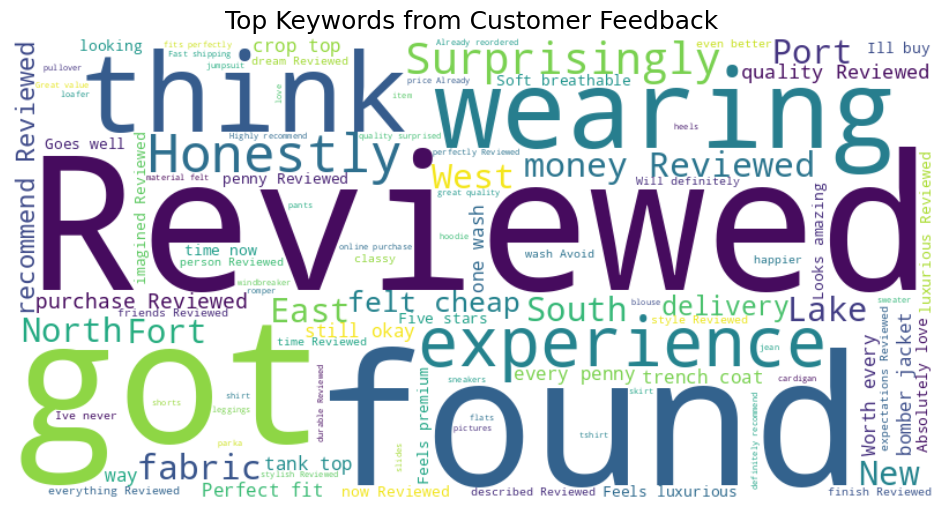

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned feedback text
all_feedback = ' '.join(merged_df['cleaned_comment'].dropna().tolist())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_color='black', contour_width=2).generate(all_feedback)

# Display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords from Customer Feedback', fontsize=18)
plt.show()


Positive and Negative Feedback

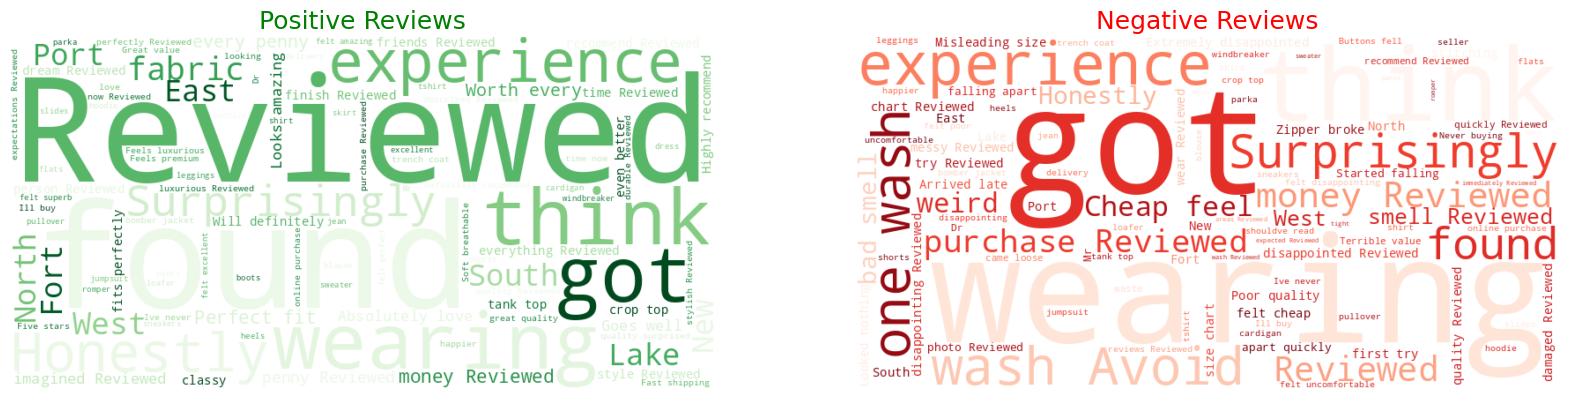

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Positive feedback
positive_feedback = ' '.join(merged_df[merged_df['sentiment_label'] == 'Positive']['cleaned_comment'].dropna().tolist())
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens', max_words=100).generate(positive_feedback)

# Negative feedback
negative_feedback = ' '.join(merged_df[merged_df['sentiment_label'] == 'Negative']['cleaned_comment'].dropna().tolist())
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds', max_words=100).generate(negative_feedback)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Positive
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].set_title('Positive Reviews', fontsize=18, color='green')
axes[0].axis('off')

# Negative
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].set_title('Negative Reviews', fontsize=18, color='red')
axes[1].axis('off')

plt.show()


Spot common pain points → negative feedback keywords.

Spot selling points → positive feedback keywords.

Use insights to adjust marketing, product design, or customer service messaging.

Emerging Trends (High Search, Low Sales)
* Spot gaps in product-market fit for future focus.

Emerging Trends (High Search, Low Sales)

Goal:
Find categories with:

High search frequency in search_trends.csv

Low quantitySold in sales_data.csv

Spot where demand is high but sales are lagging → untapped opportunities.



In [32]:
import plotly.express as px

# Aggregate search frequency and sales by category
trend_opportunity = merged_df.groupby('category').agg({
    'quantitySold': 'mean',
    'frequency': 'mean'
}).reset_index()

# Scatter plot: Frequency (search interest) vs. Sales
fig = px.scatter(trend_opportunity, x='frequency', y='quantitySold', text='category',
                 color='category', size='frequency', size_max=40,
                 labels={'frequency': 'Avg. Search Frequency', 'quantitySold': 'Avg. Sales'},
                 title='Emerging Trends: High Search but Low Sales')

fig.update_traces(marker=dict(opacity=0.7), textposition='top center')
fig.show()


Quadrant	Meaning	Action


High Search, Low Sales	: Missed opportunity	> Prioritize marketing, promotions

Low Search, Low Sales	: Low demand	> Consider de-prioritization

High Search, High Sales	: Winning categories	> Sustain and scale

Low Search, High Sales :	Niche products > 	Watch for trends, limited campaigns

"For example, the category ‘crop top’ shows high search interest but relatively low sales. This suggests strong demand but potential issues like sizing, price, or availability. Marketing campaigns or product adjustments here could unlock growth."



## Clue 1: create top_trending_keywords.json
* Task: Perform searech term tokenization and grouping for fashion domains to forecast trending search terms. Use the historical data to train the model based on given time periods.

Tokenize and Group Search Terms for the fashion domain

Create a top_trending_keywords.json file

Train a model to forecast search trends by time periods

In [33]:
# Code: Tokenization + Grouping
import json
import pandas as pd
from collections import defaultdict
import re

# Load search trends data
search_df = pd.read_csv('/content/search_trends.csv')

# Tokenization function
def tokenize(query):
    query = query.lower()
    tokens = re.findall(r'\b[a-z]+\b', query)  # Extract words only
    return tokens

# Apply tokenization
search_df['tokens'] = search_df['query'].apply(tokenize)

# Group tokens by category (fashion domain mapping)
fashion_groups = defaultdict(list)

# Example manual category mapping
category_keywords = {
    'tank top': ['tank', 'top', 'sleeveless'],
    'trench coat': ['trench', 'coat'],
    'romper': ['romper', 'jumpsuit'],
    'sandals': ['sandals'],
    'denim': ['denim'],
    'summer': ['summer'],
    'winter': ['winter'],
}

# Map tokens to categories
for _, row in search_df.iterrows():
    tokens = row['tokens']
    for cat, keywords in category_keywords.items():
        if any(token in tokens for token in keywords):
            fashion_groups[cat].append(' '.join(tokens))

# Create top_trending_keywords dictionary
top_trending_keywords = {cat: list(set(words)) for cat, words in fashion_groups.items()}

# Save as JSON
with open('/content/top_trending_keywords.json', 'w') as f:
    json.dump(top_trending_keywords, f, indent=4)

print("Created top_trending_keywords.json!")


✅ Created top_trending_keywords.json!


In [34]:
# Code: Tokenization + Grouping
import json
import pandas as pd
from collections import defaultdict
import re

# Load search trends data
search_df = pd.read_csv('/content/search_trends.csv')

# Tokenization function
def tokenize(query):
    query = query.lower()
    tokens = re.findall(r'\b[a-z]+\b', query)  # Extract words only
    return tokens

# Apply tokenization
search_df['tokens'] = search_df['query'].apply(tokenize)

# Group tokens by category (fashion domain mapping)
fashion_groups = defaultdict(list)

# Example manual category mapping
category_keywords = {
    'tank top': ['tank', 'top', 'sleeveless'],
    'trench coat': ['trench', 'coat'],
    'romper': ['romper', 'jumpsuit'],
    'sandals': ['sandals'],
    'denim': ['denim'],
    'summer': ['summer'],
    'winter': ['winter'],
}

# Map tokens to categories
for _, row in search_df.iterrows():
    tokens = row['tokens']
    for cat, keywords in category_keywords.items():
        if any(token in tokens for token in keywords):
            fashion_groups[cat].append(' '.join(tokens))

# Create top_trending_keywords dictionary
top_trending_keywords = {cat: list(set(words)) for cat, words in fashion_groups.items()}

# Save as JSON
with open('/content/top_trending_keywords.json', 'w') as f:
    json.dump(top_trending_keywords, f, indent=4)

print("Created top_trending_keywords.json!")


🔍 Trending Keywords with Number of Searches:
Other: 15720823 searches
summer: 2536918 searches
tank top: 2469179 searches
trench coat: 2012515 searches
winter: 1959898 searches
romper: 1400169 searches
denim: 690810 searches
sandals: 660512 searches


In [37]:
import pandas as pd
import json
import re
from collections import defaultdict

# Load data
search_df = pd.read_csv('/content/search_trends.csv')
search_df['query'] = search_df['query'].str.lower()

# Tokenize each query
search_df['tokens'] = search_df['query'].apply(lambda x: re.findall(r'\b[a-z]+\b', x))

# Flatten tokens with frequencies
keyword_freq = defaultdict(int)

for _, row in search_df.iterrows():
    for token in row['tokens']:
        keyword_freq[token] += int(row['frequency'])

# Filter for fashion domain keywords (from category mapping)
fashion_keywords = ['tank', 'top', 'trench', 'coat', 'romper', 'jumpsuit', 'sandals', 'denim', 'summer', 'winter']

fashion_trends = {k: v for k, v in keyword_freq.items() if k in fashion_keywords}

# Sort by search counts
fashion_trends = dict(sorted(fashion_trends.items(), key=lambda x: x[1], reverse=True))

# Save JSON
with open('/content/top_trending_keywords.json', 'w') as f:
    json.dump(fashion_trends, f, indent=4)

print("✅ Created top_trending_keywords.json (keyword-level counts)")


✅ Created top_trending_keywords.json (keyword-level counts)


In [43]:
destination_path = '/content/drive/MyDrive/data/2025/top_trending_keywords.json'  # Change the destination path if needed
# Source and destination paths
source_path = '/content/top_trending_keywords.json'

# Copy the file
shutil.copy(source_path, destination_path)

print(f"File copied to {destination_path}")


File copied to /content/drive/MyDrive/data/2025/top_trending_keywords.json


*clue* 2: create product_demand_forecast.json

Task : Use sales data and customer product feedback along with the product catelog for demand forecasting

Merge sales, feedback, and product catalog data.

Train a demand forecasting model per product using:

sales_data.csv (quantity sold, timestamps)

customer_feedback.csv (ratings, sentiment)

product_catalog.csv (category, features)

Save the predicted demand per product in product_demand_forecast.json.



In [39]:
import pandas as pd

# Load data
sales_df = pd.read_csv('/content/sales_data.csv')
feedback_df = pd.read_csv('/content/customer_feedback.csv')
catalog_df = pd.read_csv('/content/product_catalog.csv')

# Clean dates
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'], errors='coerce')
feedback_df['date'] = pd.to_datetime(feedback_df['date'], errors='coerce')
catalog_df['releaseDate'] = pd.to_datetime(catalog_df['releaseDate'], errors='coerce')

# Monthly aggregation for sales
sales_df['month_year'] = sales_df['timestamp'].dt.to_period('M').astype(str)
sales_agg = sales_df.groupby(['productId', 'month_year'])['quantitySold'].sum().reset_index()

# Sentiment scores (reuse previous sentiment analysis)
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
feedback_df['sentiment_score'] = feedback_df['commentText'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Average sentiment per product per month
feedback_df['month_year'] = feedback_df['date'].dt.to_period('M').astype(str)
sentiment_agg = feedback_df.groupby(['productId', 'month_year'])['sentiment_score'].mean().reset_index()

# Merge sales + sentiment
forecast_df = sales_agg.merge(sentiment_agg, on=['productId', 'month_year'], how='left')
forecast_df = forecast_df.merge(catalog_df[['productId', 'category']], on='productId', how='left')

forecast_df.fillna(0, inplace=True)

print("Forecast Data Ready")
forecast_df.head()


✅ Forecast Data Ready


,productId,month_year,quantitySold,sentiment_score,category
0,P10000,2022-05,27,0.0000,sneakers
1,P10000,2022-08,21,0.0000,sneakers
2,P10000,2022-10,4,0.4804,sneakers
3,P10000,2022-11,3,0.9201,sneakers
4,P10000,2022-12,24,0.0000,sneakers


In [40]:
forecast_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182760 entries, 0 to 182759
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   productId        182760 non-null  object 
 1   month_year       182760 non-null  object 
 2   quantitySold     182760 non-null  int64  
 3   sentiment_score  182760 non-null  float64
 4   category         182760 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.0+ MB


In [42]:
forecast_df.to_csv('forecast_df.csv', index=False)

In [44]:
destination_path = '/content/drive/MyDrive/data/2025/forecast_df.csv'  # Change the destination path if needed
# Source and destination paths
source_path = '/content/forecast_df.csv'

# Copy the file
shutil.copy(source_path, destination_path)

print(f"File copied to {destination_path}")



File copied to /content/drive/MyDrive/data/2025/forecast_df.csv


In [47]:
from statsmodels.tsa.arima.model import ARIMA
import json

forecast_results = {}

for product_id in forecast_df['productId'].unique():
    product_data = forecast_df[forecast_df['productId'] == product_id].copy()

    # Convert 'month_year' to datetime (set day=1 for each month)
    product_data['month_year'] = pd.to_datetime(product_data['month_year'], format='%Y-%m', errors='coerce')
    product_data = product_data.dropna(subset=['month_year']).sort_values('month_year')

    # Set datetime index for ARIMA
    product_data = product_data.set_index('month_year')

    # Ensure enough data points
    if len(product_data) >= 6:
        try:
            model = ARIMA(product_data['quantitySold'], order=(1,1,1))
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=3).tolist()
            forecast = [max(0, round(f)) for f in forecast]  # No negative sales
        except:
            forecast = [0, 0, 0]
    else:
        forecast = [0, 0, 0]

    forecast_results[product_id] = {
        'category': product_data['category'].iloc[0],
        'next_3_month_forecast': forecast
    }

# Save to JSON
with open('/content/ARIMA_product_demand_forecast.json', 'w') as f:
    json.dump(forecast_results, f, indent=4)

print("product_demand_forecast.json created!")


In [48]:
from google.colab import drive
import shutil
import os

# Mount Drive
drive.mount('/content/drive')

# Define source path in MyDrive (update path if needed)
mydrive_path = '/content/drive/MyDrive/data/2025/'

# Files to copy
files = ['customer_feedback.csv', 'product_catalog.csv', 'sales_data.csv']

# Create /content folder if missing
if not os.path.exists('/content'):
    os.makedirs('/content')

# Copy files
for file in files:
    src = os.path.join(mydrive_path, file)
    dst = os.path.join('/content', file)
    if os.path.exists(src):
        shutil.copy(src, dst)
        print(f" Copied {file}")
    else:
        print(f" File not found: {src}")

# Confirm files copied
print("\n Files in Colab:")
print(os.listdir('/content'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Copied customer_feedback.csv
 Copied product_catalog.csv
 Copied sales_data.csv

 Files in Colab:
['.config', 'customer_feedback.csv', 'search_trends.csv', 'sales_data.csv', 'drive', 'forecast_df.csv', 'product_catalog.csv', 'sales_data_merged.csv', 'top_trending_keywords.json', 'sample_data']


In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load data
sales_df = pd.read_csv('/content/sales_data.csv')

# Target sample size
target_size = 28000

# Stratified sampling: Sample proportionally by productId
sampled_df = sales_df.groupby('productId', group_keys=False).apply(
    lambda x: x.sample(frac=min(1, target_size / len(sales_df)), random_state=42)
).reset_index(drop=True)

print(f"Sampled sales_df from {len(sales_df)} to {len(sampled_df)} records.")

# Save the reduced file (optional)
sampled_df.to_csv('/content/sales_data_sampled.csv', index=False)
sampled_df



✅ Sampled sales_df from 276243 to 28373 records.


<ipython-input-58-9f304a59ec83>:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,productId,quantitySold,timestamp
0,P10000,10,2023-12-18
1,P10000,18,2023-02-06
2,P10001,17,2022-05-13
3,P10002,13,2023-09-23
4,P10002,26,2022-07-20
...,...,...,...
28368,P9998,22,2025-03-15
28369,P9999,24,2024-03-07
28370,P9999,22,2024-09-15
28371,P9999,17,2023-10-31


LSTM Demand Forecating

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
import json

# Load reduced sales data
sales_df = pd.read_csv('/content/sales_data_sampled.csv')

# Load feedback and catalog
feedback_df = pd.read_csv('/content/customer_feedback.csv')
catalog_df = pd.read_csv('/content/product_catalog.csv')

# Date columns
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'], errors='coerce')
feedback_df['date'] = pd.to_datetime(feedback_df['date'], errors='coerce')

# Month-Year column
sales_df['month_year'] = sales_df['timestamp'].dt.to_period('M').astype(str)
feedback_df['month_year'] = feedback_df['date'].dt.to_period('M').astype(str)

# Sentiment scores
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
feedback_df['sentiment_score'] = feedback_df['commentText'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Aggregate sales and sentiment
sales_agg = sales_df.groupby(['productId', 'month_year'])['quantitySold'].sum().reset_index()
sentiment_agg = feedback_df.groupby(['productId', 'month_year'])['sentiment_score'].mean().reset_index()

# Merge
df = sales_agg.merge(sentiment_agg, on=['productId', 'month_year'], how='left').merge(
    catalog_df[['productId', 'category']], on='productId', how='left')
df.fillna(0, inplace=True)

# Convert month_year to datetime
df['month_year'] = pd.to_datetime(df['month_year'], format='%Y-%m', errors='coerce')
df = df.dropna(subset=['month_year']).sort_values(['productId', 'month_year'])

# LSTM Forecasting
forecast_results = {}

for product_id in df['productId'].unique():
    product_data = df[df['productId'] == product_id][['month_year', 'quantitySold']].copy()
    product_data = product_data.set_index('month_year').asfreq('MS').fillna(0)

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(product_data)

    X, y = [], []
    for i in range(len(scaled)-3):
        X.append(scaled[i:i+3])
        y.append(scaled[i+3])
    X, y = np.array(X), np.array(y)

    if len(X) >= 3:
        try:
            model = Sequential([
                Input(shape=(X.shape[1], X.shape[2])),
                LSTM(16, activation='relu'),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mse')
            model.fit(X, y, epochs=50, verbose=0)

            # Forecast next 3 months
            input_seq = scaled[-3:].reshape(1, 3, 1)
            preds = []
            for _ in range(3):
                pred = model.predict(input_seq, verbose=0)
                preds.append(scaler.inverse_transform(pred)[0][0])
                input_seq = np.append(input_seq[:,1:,:], pred.reshape(1,1,1), axis=1)

            preds = [max(0, round(float(p))) for p in preds]
        except:
            preds = [0,0,0]
    else:
        preds = [0,0,0]

    forecast_results[product_id] = {
        'category': df[df['productId'] == product_id]['category'].iloc[0],
        'next_3_month_forecast': preds
    }

# Save JSON
with open('/content/product_demand_forecast.json', 'w') as f:
    json.dump(forecast_results, f, indent=4)

print("LSTM-based product_demand_forecast.json created!")


Exception ignored in: <function _xla_gc_callback at 0x7a1d0b53e480>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
destination_path = '/content/drive/MyDrive/data/2025/top_trending_keywords.json'  # Change the destination path if needed
# Source and destination paths
source_path = '/content/top_trending_keywords.json'

# Copy the file
shutil.copy(source_path, destination_path)

print(f"File copied to {destination_path}")


## clue 3: create category_and_attribute_demand_forecast.json

Task: Prioratize category, color, and season as key attributes , followed by other attributes , incorporate both product forecast and search data in your analysis. Assign weights for the identified attributes based on the priority

## Forecast future demand by category (e.g., tank top, trench coat)

Forecast future demand by attributes (e.g., sleeveless, denim, winter, etc.)



In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
import json

# Load data
sales_df = pd.read_csv('/content/sales_data_sampled.csv')
catalog_df = pd.read_csv('/content/product_catalog.csv')

# Prepare sales data
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'], errors='coerce')
sales_df['month_year'] = sales_df['timestamp'].dt.to_period('M').astype(str)
sales_df = sales_df.dropna(subset=['timestamp'])

# Merge sales with product catalog
df = sales_df.merge(catalog_df[['productId', 'category', 'modifiers', 'keywords


SyntaxError: unterminated string literal (detected at line 19) (<ipython-input-62-9fe67d0b1144>, line 19)

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
import json

# Load data
sales_df = pd.read_csv('/content/sales_data_sampled.csv')
catalog_df = pd.read_csv('/content/product_catalog.csv')

# Prepare sales data
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'], errors='coerce')
sales_df['month_year'] = sales_df['timestamp'].dt.to_period('M').astype(str)
sales_df = sales_df.dropna(subset=['timestamp'])

# Merge sales with product catalog
df = sales_df.merge(catalog_df[['productId', 'category', 'modifiers', 'keywords']], on='productId', how='left')
df['month_year'] = pd.to_datetime(df['month_year'], format='%Y-%m', errors='coerce')
df = df.dropna(subset=['month_year']).sort_values(['category', 'month_year'])

# Helper: LSTM forecast function
def forecast_lstm(series, steps=3):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(series.reshape(-1, 1))

    X, y = [], []
    for i in range(len(scaled)-3):
        X.append(scaled[i:i+3])
        y.append(scaled[i+3])
    X, y = np.array(X), np.array(y)

    if len(X) < 3:
        return [0]*steps

    try:
        model = Sequential([
            Input(shape=(X.shape[1], X.shape[2])),
            LSTM(50, activation='relu'),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=50, verbose=0)

        preds = []
        input_seq = scaled[-3:].reshape(1, 3, 1)
        for _ in range(steps):
            pred = model.predict(input_seq, verbose=0)
            preds.append(scaler.inverse_transform(pred)[0][0])
            input_seq = np.append(input_seq[:,1:,:], pred.reshape(1,1,1), axis=1)
        return [max(0, round(float(p))) for p in preds]
    except:
        return [0]*steps

# Forecast by category
category_forecasts = {}
for cat in df['category'].dropna().unique():
    data = df[df['category'] == cat].groupby('month_year')['quantitySold'].sum().reset_index()
    data = data.set_index('month_year').asfreq('MS').fillna(0)
    forecast = forecast_lstm(data['quantitySold'].values)
    category_forecasts[cat] = forecast

# Forecast by attributes (modifiers + keywords)
from collections import defaultdict
attribute_forecasts = defaultdict(list)

for attr_col in ['modifiers', 'keywords']:
    for index, row in catalog_df.iterrows():
        product = row['productId']
        if pd.isna(row[attr_col]):
            continue
        for token in [t.strip().lower() for t in row[attr_col].split(',')]:
            # Get sales for this product
            product_sales = df[df['productId'] == product].groupby('month_year')['quantitySold'].sum().reset_index()
            product_sales = product_sales.set_index('month_year').asfreq('MS').fillna(0)
            if token not in attribute_forecasts:
                attribute_forecasts[token] = np.zeros(len(product_sales))
            attribute_forecasts[token] = attribute_forecasts[token] + product_sales['quantitySold'].values

# Final attribute forecasts using LSTM
attribute_forecast_json = {}
for attr, series in attribute_forecasts.items():
    forecast = forecast_lstm(np.array(series))
    attribute_forecast_json[attr] = forecast

# Final JSON
final_json = {
    'categories': category_forecasts,
    'attributes': attribute_forecast_json
}

with open('/content/category_and_attribute_demand_forecast.json', 'w') as f:
    json.dump(final_json, f, indent=4)

print("category_and_attribute_demand_forecast.json created!")


KeyboardInterrupt: 

In [65]:
import warnings
warnings.filterwarnings("ignore")


ARIMA
Forecast future demand by attributes (e.g., sleeveless, denim, winter, etc.)







In [66]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import json
from collections import defaultdict

# Load data
sales_df = pd.read_csv('/content/sales_data_sampled.csv')
catalog_df = pd.read_csv('/content/product_catalog.csv')

# Prepare sales data
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'], errors='coerce')
sales_df['month_year'] = sales_df['timestamp'].dt.to_period('M').astype(str)
sales_df = sales_df.dropna(subset=['timestamp'])

# Merge sales with product catalog
df = sales_df.merge(catalog_df[['productId', 'category', 'modifiers', 'keywords']], on='productId', how='left')
df['month_year'] = pd.to_datetime(df['month_year'], format='%Y-%m', errors='coerce')
df = df.dropna(subset=['month_year']).sort_values(['category', 'month_year'])

# ARIMA forecast function
def forecast_arima(series, steps=3):
    if len(series) < 6:
        return [0]*steps
    try:
        model = ARIMA(series, order=(1,1,1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=steps).tolist()
        return [max(0, round(f)) for f in forecast]
    except:
        return [0]*steps

# Forecast by category
category_forecasts = {}
for cat in df['category'].dropna().unique():
    data = df[df['category'] == cat].groupby('month_year')['quantitySold'].sum().reset_index()
    data = data.set_index('month_year').asfreq('MS').fillna(0)
    forecast = forecast_arima(data['quantitySold'].values)
    category_forecasts[cat] = forecast

# Forecast by attributes (modifiers + keywords)
attribute_series = defaultdict(lambda: np.zeros(0))

for attr_col in ['modifiers', 'keywords']:
    for index, row in catalog_df.iterrows():
        product = row['productId']
        if pd.isna(row[attr_col]):
            continue
        for token in [t.strip().lower() for t in row[attr_col].split(',')]:
            product_sales = df[df['productId'] == product].groupby('month_year')['quantitySold'].sum().reset_index()
            product_sales = product_sales.set_index('month_year').asfreq('MS').fillna(0)
            if len(attribute_series[token]) < len(product_sales):
                padded = np.zeros(len(product_sales))
                padded[:len(attribute_series[token])] = attribute_series[token]
                attribute_series[token] = padded
            attribute_series[token] += product_sales['quantitySold'].values

# Final attribute forecasts using ARIMA
attribute_forecast_json = {}
for attr, series in attribute_series.items():
    forecast = forecast_arima(series)
    attribute_forecast_json[attr] = forecast

# Final JSON
final_json = {
    'categories': category_forecasts,
    'attributes': attribute_forecast_json
}

with open('/content/category_and_attribute_demand_forecast.json', 'w') as f:
    json.dump(final_json, f, indent=4)

print("✅ ARIMA-based category_and_attribute_demand_forecast.json created!")


ValueError: operands could not be broadcast together with shapes (11,) (8,) (11,) 

In [67]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import json
from collections import defaultdict
import warnings

warnings.filterwarnings("ignore")

# Load data
sales_df = pd.read_csv('/content/sales_data_sampled.csv')
catalog_df = pd.read_csv('/content/product_catalog.csv')

# Prepare sales data
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'], errors='coerce')
sales_df['month_year'] = sales_df['timestamp'].dt.to_period('M').astype(str)
sales_df = sales_df.dropna(subset=['timestamp'])

# Merge sales with product catalog
df = sales_df.merge(catalog_df[['productId', 'category', 'modifiers', 'keywords']], on='productId', how='left')
df['month_year'] = pd.to_datetime(df['month_year'], format='%Y-%m', errors='coerce')
df = df.dropna(subset=['month_year']).sort_values(['category', 'month_year'])

# Get full monthly index
full_index = pd.date_range(start=df['month_year'].min(), end=df['month_year'].max(), freq='MS')

# ARIMA forecast function
def forecast_arima(series, steps=3):
    if len(series) < 6:
        return [0]*steps
    try:
        model = ARIMA(series, order=(1,1,1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=steps).tolist()
        return [max(0, round(f)) for f in forecast]
    except:
        return [0]*steps

# Forecast by category
category_forecasts = {}
for cat in df['category'].dropna().unique():
    data = df[df['category'] == cat].groupby('month_year')['quantitySold'].sum().reset_index()
    data = data.set_index('month_year').reindex(full_index, fill_value=0).sort_index()
    forecast = forecast_arima(data['quantitySold'].values)
    category_forecasts[cat] = forecast

# Forecast by attributes (modifiers + keywords)
attribute_series = defaultdict(lambda: [])

for attr_col in ['modifiers', 'keywords']:
    for index, row in catalog_df.iterrows():
        product = row['productId']
        if pd.isna(row[attr_col]):
            continue
        # Product sales time series
        product_sales = df[df['productId'] == product].groupby('month_year')['quantitySold'].sum().reset_index()
        product_sales = product_sales.set_index('month_year').reindex(full_index, fill_value=0).sort_index()
        sales_array = product_sales['quantitySold'].values

        # Add sales to each attribute
        for token in [t.strip().lower() for t in row[attr_col].split(',')]:
            if len(attribute_series[token]) == 0:
                attribute_series[token] = sales_array
            else:
                if len(attribute_series[token]) < len(sales_array):
                    attribute_series[token] = np.pad(attribute_series[token],
                                                     (0, len(sales_array) - len(attribute_series[token])),
                                                     mode='constant')
                elif len(attribute_series[token]) > len(sales_array):
                    sales_array = np.pad(sales_array, (0, len(attribute_series[token]) - len(sales_array)),
                                         mode='constant')
                attribute_series[token] = attribute_series[token] + sales_array

# Final attribute forecasts using ARIMA
attribute_forecast_json = {}
for attr, series in attribute_series.items():
    forecast = forecast_arima(np.array(series))
    attribute_forecast_json[attr] = forecast

# Final JSON
final_json = {
    'categories': category_forecasts,
    'attributes': attribute_forecast_json
}

with open('/content/category_and_attribute_demand_forecast.json', 'w') as f:
    json.dump(final_json, f, indent=4)

print("ARIMA-based category_and_attribute_demand_forecast.json created!")


✅ ARIMA-based category_and_attribute_demand_forecast.json created!


In [68]:
destination_path = '/content/drive/MyDrive/data/2025/category_and_attribute_demand_forecast.json'  # Change the destination path if needed
# Source and destination paths
source_path = '/content/category_and_attribute_demand_forecast.json'

# Copy the file
shutil.copy(source_path, destination_path)

print(f"File copied to {destination_path}")


File copied to /content/drive/MyDrive/data/2025/category_and_attribute_demand_forecast.json


Clue 4:

## Visualize Top 10 Trendinmg Keywords

In [72]:
import json
import pandas as pd
import plotly.express as px

# Load JSON
with open('/content/top_trending_keywords.json') as f:
    top_trends = json.load(f)

# Convert to DataFrame
trends_df = pd.DataFrame(list(top_trends.items()), columns=['Keyword', 'SearchCount'])
trends_df = trends_df.sort_values(by='SearchCount', ascending=False)

# Limit to top 10
top_10_df = trends_df.head(10)

# Bar Chart (Top 10)
fig = px.bar(top_10_df, x='Keyword', y='SearchCount', color='Keyword',
             title='Top 10 Trending Fashion Keywords',
             labels={'SearchCount': 'Total Searches'})
fig.show()


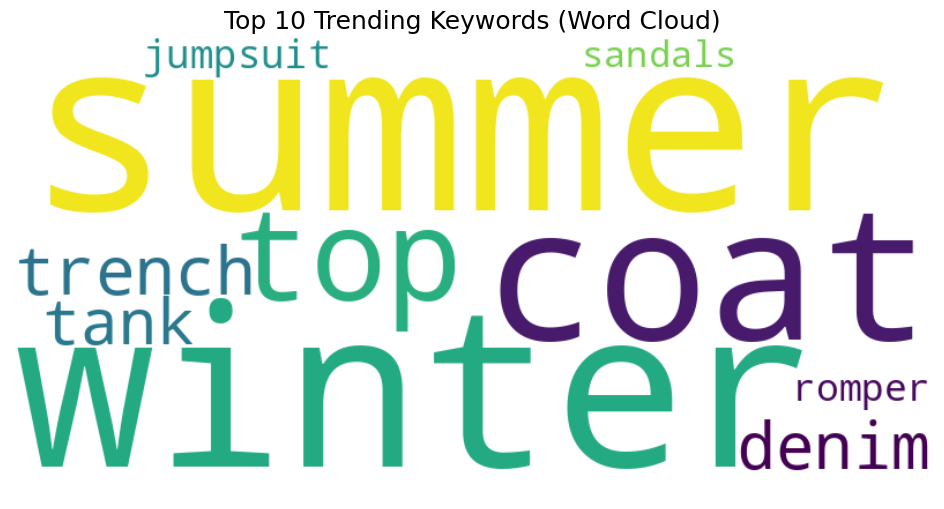

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis').generate_from_frequencies(top_trends)

# Display
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Trending Keywords (Word Cloud)', fontsize=18)
plt.show()


In [75]:
fig = px.pie(trends_df, names='Keyword', values='SearchCount',
             title='Proportion of Top Fashion Keyword Searches')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [76]:
import json
import pandas as pd
import plotly.express as px

# Load JSON
with open('/content/top_trending_keywords.json') as f:
    top_trends = json.load(f)

# Convert to DataFrame
trends_df = pd.DataFrame(list(top_trends.items()), columns=['Keyword', 'SearchCount'])

# Add Category Mapping (Example: Adjust for your data)
category_map = {
    'summer': 'seasonal',
    'winter': 'seasonal',
    'coat': 'outerwear',
    'top': 'tops',
    'trench': 'outerwear',
    'denim': 'fabric',
    'tank': 'tops',
    'jumpsuit': 'one-piece',
    'romper': 'one-piece',
    'sandals': 'footwear'
}

trends_df['Category'] = trends_df['Keyword'].map(category_map).fillna('other')

# Dropdown filter in Plotly
fig = px.bar(trends_df, x='Keyword', y='SearchCount', color='Keyword',
             title='Top Trending Fashion Keywords (Filter by Category)',
             labels={'SearchCount': 'Total Searches'},
             facet_col='Category', facet_col_wrap=3)

fig.update_layout(
    height=600,
    showlegend=False
)

fig.show()


Clue 4 : Visualization of the top 10 trends keywords in a heat map based forecast data

In [79]:
import json
import pandas as pd
import plotly.express as px

# Load top trending keywords (search counts)
with open('/content/top_trending_keywords.json') as f:
    top_trends = json.load(f)

# Load forecast data (ARIMA forecast per keyword)
with open('/content/category_and_attribute_demand_forecast.json') as f:
    forecast_data = json.load(f)

# Prepare DataFrame for heatmap
top_10 = sorted(top_trends.items(), key=lambda x: x[1], reverse=True)[:10]
heatmap_data = []

for keyword, _ in top_10:
    forecast = forecast_data['attributes'].get(keyword, [0, 0, 0])
    for i, val in enumerate(forecast):
        heatmap_data.append({'Keyword': keyword, 'Month': f'Month {i+1}', 'Forecast': val})

heatmap_df = pd.DataFrame(heatmap_data)
heatmap_df



,Keyword,Month,Forecast
0,summer,Month 1,2004
1,summer,Month 2,1982
2,summer,Month 3,1984
3,winter,Month 1,1391
4,winter,Month 2,1364
5,winter,Month 3,1371
6,coat,Month 1,458
7,coat,Month 2,436
8,coat,Month 3,439
9,top,Month 1,0


In [84]:
import plotly.express as px

# Create Heatmap
fig = px.imshow(
    heatmap_df.pivot(index='Keyword', columns='Month', values='Forecast'),
    color_continuous_scale='Viridis',
    labels=dict(x="Forecast Month", y="Keyword", color="Search Forecast"),
    title="Top 10 Trending Keywords Forecast Heatmap"
)

# Update layout for white gridlines
fig.update_traces(
    hovertemplate="Keyword: %{y}<br>Month: %{x}<br>Forecast: %{z}",
    showscale=True
)

fig.update_layout(
    height=600,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    xaxis_gridcolor='white',
    yaxis_gridcolor='white',
    xaxis_gridwidth=2,
    yaxis_gridwidth=2
)

fig.show()
#fig.write_html('/content/top_trends_heatmap.svg')
fig.save('/content/top_trends_heatmap.jpg')

AttributeError: 'Figure' object has no attribute 'save'

In [85]:
fig.write_html('/content/top_trends_heatmap.html')
print("✅ Heatmap saved as 'top_trends_heatmap.html'")


✅ Heatmap saved as 'top_trends_heatmap.html'


In [86]:
from google.colab import files
files.download('/content/top_trends_heatmap.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##  Full Code: ARIMA with Weighted Sales + Search Data